<a href="https://colab.research.google.com/github/DinWaikabu/Machine_Learning/blob/master/Kmeans_Mall_Customers_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"masarete061194","key":"16cfc22476a3449d52556070b8f6f3f1"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.51k [00:00<?, ?B/s]
100% 1.51k/1.51k [00:00<00:00, 2.80MB/s]


#### Ekstrak file

In [13]:
from zipfile import ZipFile
file_name = 'customer-segmentation-tutorial-in-python.zip' 

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('selesai')

selesai


In [14]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.isnull().sum() # mendeteksi mising data

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [0]:
df.drop(['CustomerID'], 1, inplace=True) # menghapus kolm CustID

In [17]:
import numpy as np 

# megtasi data non nunerik

def mengatasi_non_numeric(df):    
  columns = df.columns.values
  
  for column in columns:
    text_digit_val = {}
    def convert_to_int(val):
      return text_digit_val[val]
    
    if df[column].dtype!= np.int64 and df[column].dtype != np.float64:
      column_contents = df[column].values.tolist()
      unique_elements = set(column_contents)
      x=0
      
      for unique in unique_elements:
        if unique not in text_digit_val:
          text_digit_val[unique] = x
          x +=1 
          
      df[column] = list(map(convert_to_int, df[column]))
    return df
df = mengatasi_non_numeric(df)
print(df.head(10))
  

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40
5       0   22                  17                      76
6       0   35                  18                       6
7       0   23                  18                      94
8       1   64                  19                       3
9       0   30                  19                      72


In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.decomposition import PCA

In [0]:
dff = preprocessing.scale(df)

In [0]:
pca = PCA(n_components=2).fit(dff)
pca_2d = pca.transform(dff)

In [0]:
Clf = KMeans(n_clusters = 3)
Clf.fit(pca_2d)
prediksi = Clf.predict(pca_2d)

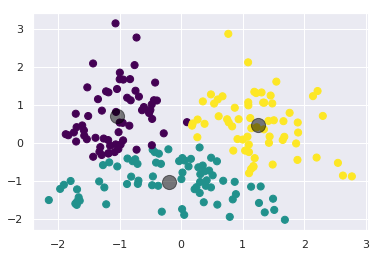

In [74]:
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=prediksi, s=50, cmap='viridis')
centers = Clf.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);